<a href="https://colab.research.google.com/github/sizzoh/BTS/blob/main/test_maize_spot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
model = tf.keras.models.load_model('trained_model.keras')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

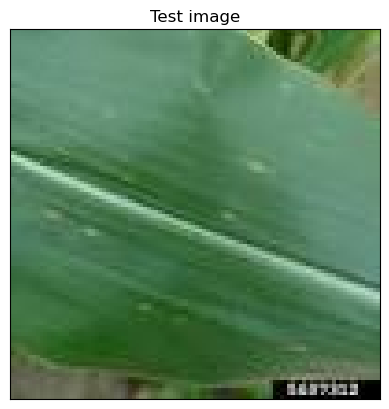

In [ ]:
###Visualizing Single Image of Test set
import cv2
image_path = "test/test/images27.JPG"

###Reading image
img = cv2.imread(image_path)
img= cv2.cvtColor(img,cv2.CO,LOR_BGR2RGB)

###Displaying image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])###convert single image to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 172ms/step


(array([[7.7098156e-07, 1.0012372e-07, 2.7361134e-06, 9.9999642e-01]],
       dtype=float32),
 (1, 4))

In [ ]:
result_index= np.argmax(prediction)
result_index

3

In [ ]:
class_name = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy']

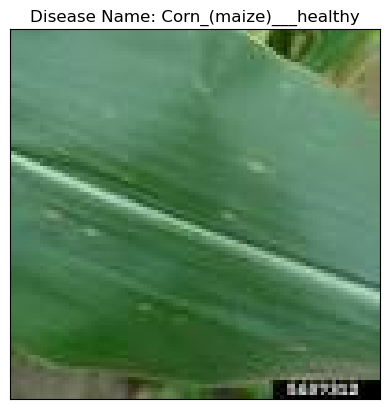

In [ ]:
###Display Result of Prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model_prediction

'Corn_(maize)___healthy'